<a href="https://colab.research.google.com/github/LaZoark/number_recognition/blob/main/number_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!nvidia-smi

Tue Dec  1 08:24:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |   1637MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
from keras.datasets import mnist

In [30]:
(imgTrain, lableTrain), (imgTest,lableTest) = mnist.load_data()

In [31]:
print('train img',imgTrain.shape)
print('train lable',lableTrain.shape)
print('test img',imgTest.shape)
print('test lable',lableTest.shape)

train img (60000, 28, 28)
train lable (60000,)
test img (10000, 28, 28)
test lable (10000,)


In [32]:
import matplotlib.pyplot as plt


In [33]:
def plt_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

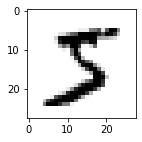

In [34]:
plt_image(imgTrain[0])

In [35]:
Train4D = imgTrain.reshape(imgTrain.shape[0],28,28,1).astype('float32')
Test4D = imgTest.reshape(imgTest.shape[0],28,28,1).astype('float32')
Train4D_normalize = Train4D/255
Test4D_normalize = Test4D/255

In [36]:
from keras.utils import np_utils
TrainOneHot = np_utils.to_categorical(lableTrain)
TestOneHot = np_utils.to_categorical(lableTest)
lableTrain[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [46]:
def get_model():
  model=Sequential()
  model.add(Conv2D(filters=32,
                   kernel_size=(5,5),
                   padding='same',
                   input_shape=(28,28,1),
                   activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(1500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))
  return model

In [47]:
model = get_model()

In [48]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              9409500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15010     
Total params: 9,425,342
Trainable params: 9,425,342
Non-trainable params: 0
____________________________________________

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [51]:
trainHistory = model.fit(x=Train4D_normalize,
                         y=TrainOneHot,
                         validation_split=0.2,
                         epochs=10,batch_size=500,
                         verbose=1)

Epoch 1/10
96/96 [==============================] - 2s 18ms/step - loss: 0.2983 - accuracy: 0.9078 - val_loss: 0.0913 - val_accuracy: 0.9750
Epoch 2/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0612 - val_accuracy: 0.9827
Epoch 3/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.0535 - val_accuracy: 0.9849
Epoch 4/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 5/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0428 - val_accuracy: 0.9878
Epoch 6/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 7/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 8/10
96

In [57]:
def show_trainHistory(train,validation):
  plt.plot(trainHistory.history[train])
  plt.plot(trainHistory.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('times')
  plt.legend(['train','validation'],loc='upper left')

  plt.show()

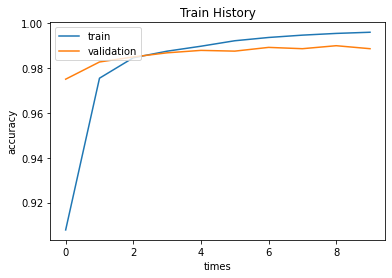

In [58]:
show_trainHistory('accuracy','val_accuracy')

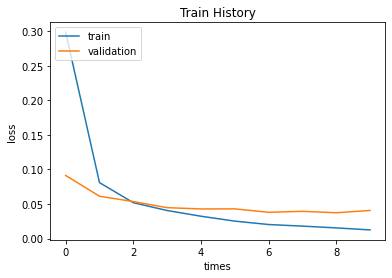

In [59]:
show_trainHistory('loss','val_loss')

In [60]:
scores = model.evaluate(Test4D_normalize,TestOneHot)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9897


0.9897000193595886

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


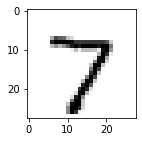

In [61]:
prediction = model.predict_classes(Test4D_normalize)
prediction[0]
plt_image(imgTest[0])

In [62]:
import pandas as pd
pd.crosstab(lableTest, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1131,1,1,0,0,1,1,0,0
2,1,1,1020,0,0,0,1,5,4,0
3,0,0,1,1002,0,2,0,0,4,1
4,0,1,0,0,973,0,3,0,1,4
5,1,0,0,7,0,878,3,0,2,1
6,3,2,0,0,1,2,948,0,2,0
7,1,1,4,3,0,0,0,1016,1,2
8,3,1,1,0,0,0,0,1,965,3


In [85]:
model.save('model.h5')
model.save_weights("model_weights.h5")
print("存取成功")

try:
  model.load_weights("model_weights.h5")
  print("載入模型成功!繼續訓練模型")
except:
  print("載入模型失敗!繼續訓練新的模型")

存取成功
載入模型成功!繼續訓練模型


In [86]:
from PIL import Image
import numpy as np
from keras.models import load_model
model = load_model("model.h5")

In [87]:
import os 
add = []
bigdata = "/content/simg"
save=os.listdir(bigdata)
save.sort()

In [88]:
for picture in save:
    full_path = os.path.join(bigdata,picture)
    if not os.path.isdir(full_path):
        im = Image.open(full_path).convert('L')
        for i in range(im.size[0]):
            for j in range(im.size[1]):
                if(im.getpixel((i,j))>128):  
                    im.putpixel((i,j),255) 
                else: 
                    im.putpixel((i,j),0) 
        data = np.array(im.getdata()) 
        data=np.abs(data-255)
        add.append(data)

predict= 0


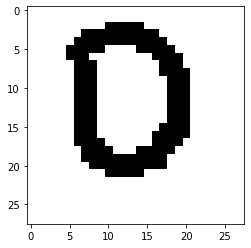

predict= 6


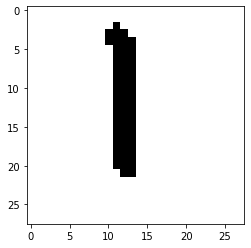

predict= 2


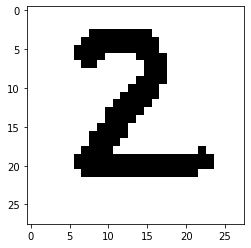

predict= 3


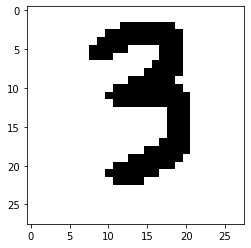

predict= 4


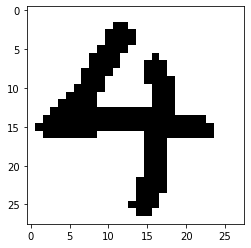

predict= 8


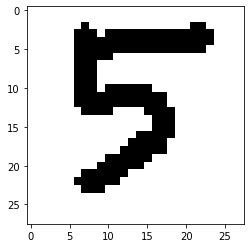

predict= 6


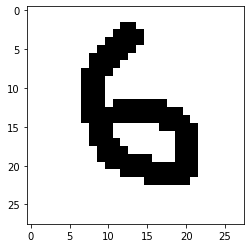

predict= 7


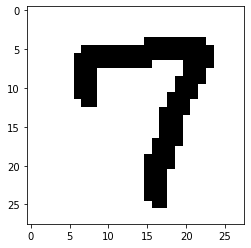

predict= 8


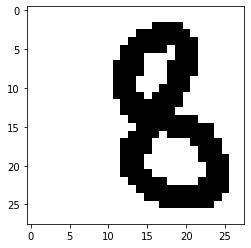

predict= 8


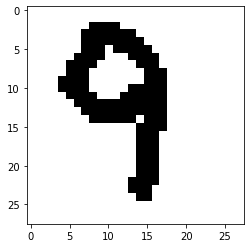

In [89]:
import matplotlib.pyplot as plt
label = [0,1,2,3,4,5,6,7,8,9] 
for i in range(10): 
      a=add[i].reshape(28,28)
      res=model.predict(add[i].reshape(1,28,28,1))
      idx = np.argmax(res)
      print("predict=",label[idx])
      plt.imshow(a, cmap='binary')
      plt.show()